# 【自前AI講座】SVM（サポートベクターマシン）の理論／数式／コード実装

---

## 理論と数式

### 線形問題・・・・Linear SVM

まずは線形の SVM について考えます．  
説明変数を $\boldsymbol{x}$，重みを $\boldsymbol{w}$，バイアスを $b$ とするとき，識別関数を次式で与えます．

$$
f({\boldsymbol{x}}) = \text{sgn} \ (\boldsymbol{w}^T \boldsymbol{x} + b)
$$

ここで上付きの $T$ は行列の転置，$\text{sgn}$ は符号関数 (sigh function) で，与えられた実数 $x$ に対しその符号に応じて {1, -1, 0} のいずれかを返します．

$$
\text{sgn} \ (x)
= \begin{cases}
 1 & : \ & x \gt 0 \\
 0 & : \ & x = 0 \\
-1 & : \ & x \lt 0
\end{cases}
$$

紛らわしいので，以下，「ベクトル $\boldsymbol{x}$ の $i$ 番目の要素」という表現では $x_i$，「$i$ 番目のベクトル $\boldsymbol{x}$」という表現では $x^{(i)}$ と表記します．  
$i$ 番目の正解ラベルを $y^{(i)} = \{-1, \ 1\}$ とすると，決定境界 $f(\boldsymbol{x}) = 0$ に対する正／負の超平面の式は次で書き表せます．

$$
\text{sgn} \ (\boldsymbol{w}^T \boldsymbol{x}_{+} + b) = 1 \\
\text{sgn} \ (\boldsymbol{w}^T \boldsymbol{x}_{-} + b) = -1 \\
$$

上の式から下の式を引き算すると $b$ がキャンセルされるので，

$$
\boldsymbol{w}^T \left(\boldsymbol{x}_{+} - \boldsymbol{x}_{-} \right) = 2
$$

となります．  
ベクトルの大きさ（ノルム）：

$$
\| \boldsymbol{w} \| = \sqrt{
    \sum_{j = 1}^{m}{w_j^2}
}
$$

で標準化すると，

$$
\frac{\boldsymbol{w}^T \left(\boldsymbol{x}_{+} - \boldsymbol{x}_{-} \right)}{\| \boldsymbol{w} \|}
= \frac{2}{\| \boldsymbol{w} \|}
$$

となり，この式の左辺は，正／負の超平面の法線距離，すなわち，最大化したいマージンを表します．  
よって，同じくマージンである右辺を最大化すれば良いことになります．  
しかし，これの逆数をとって２乗した $\frac{1}{2} \| w \|^2$ を最小化するほうが二次計画法によって解くことができるため，実際にはこちらで計算されるそうです (The Nature of Statistical Learning Theory (V. Vapnik)) ．  
また，このとき，超平面から各学習サンプルまでの距離 $d_i$ は次式で表されます．

$$
d_i = \frac{y_i (\boldsymbol{w}^T \boldsymbol{x} + b)}{\| w \|}
$$

SVM の学習ではマージン $d$ を最大化するような超平面の重みベクトル $\boldsymbol{w}$ とバイアス $b$ を求めます（後に出てくるソフトマージンと対比して，こちらはハードマージンとも呼ばれます）．  
超平面に一番近い学習サンプル（サポートベクター）と，マージンが最大となる重みベクトル及びバイアスは，数式では次式のように表現できます．

$$
\underset{\boldsymbol{w}, b}{\text{arg max}} \left( \min_{i} \left(
    \frac{y^{(i)} (\boldsymbol{w}^T \boldsymbol{x}^{(i)} + b)}{\| w \|}
\right) \right)
= \underset{\boldsymbol{w}, b}{\text{arg max}} \left(
    \frac{1}{\| w \|}
    \min_{i} \left(
    \boldsymbol{w}^T \boldsymbol{x}^{(i)} + b
\right) \right)
\rightarrow \underset{\boldsymbol{w}, b}{\text{arg min}} \frac{1}{2} \| w \|^2
$$

$i$ 番目のサンプルについて，各ラベルについて次のように式を書き直します．

$$
\boldsymbol{w}^T \boldsymbol{x}^{(i)} + b \ge 1 \ (y^{(i)} = 1) \\
\boldsymbol{w}^T \boldsymbol{x}^{(i)} + b \le -1 \ (y^{(i)} = -1)
$$

ここでデータセットは $N$ 個のサンプルからなり，$i = \{1, 2, \cdots, N\}$ です．  
上記２式は，負のサンプルは全て負の超平面側，正のサンプルは全て正の超平面側にあることを表しています．  
つまり，任意の $i$ 番目のサンプルに対し次式が成り立ちます．

$$
y^{(i)} \left( \boldsymbol{w}^T \boldsymbol{x}^{(i)} + b \right) \ge 1
$$

しかし，上記は線形分離可能な（２次元空間上で１本の線で分けられるような）データに対しては一意に重みとバイアスは求まりますが，線形分離不可能なデータ（１本の線で分けることができず分布が入り組んでいるデータ）では一意に求まりません．  
そこで，考えられたのがソフトマージン SVM です．  
ソフトマージン SVM では，誤分類が存在する状態のまま最適化問題を収束させるため，以下のようにスラック変数 $\xi$ を導入します．

$$
\boldsymbol{w}^T \boldsymbol{x}^{(i)} + b \ge 1 - \xi^{(i)} \ (y^{(i)} = 1) \\
\boldsymbol{w}^T \boldsymbol{x}^{(i)} + b \le - 1 + \xi^{(i)} \ (y^{(i)} = -1)
$$

従って，ソフトマージン SVM で最小化するのは次式です．

$$
\underset{\boldsymbol{w}, b}{\text{arg min}} \frac{1}{2} \| w \|^2 + C \sum_{i=1}^{N}{\xi^{(i)}}
$$

ハードマージン SVM と比較して第２項が制約（緩和策）として追加されました．  
ここで $\sum_{i=1}^{N}{\xi^{(i)}}$ は誤分類したサンプルから超平面までの法線距離の総和を表します．  
残りの変数 C はハイパーパラメータで，これによって誤分類のペナルティの強さを制御します．  
第２項は誤分類の度合いの総和なので，係数である C が大きいと誤分類のペナルティが大きく，C が小さいと誤分類に対してより寛大であることを意味します．

### 非線形問題・・・・Kernel SVM

前の節では線形問題，すなわち１本の直線で上手く分類できるようなデータに対して検討していましたが，世の中スパッと１本の直線で綺麗に分けられる問題は少なく，現実良くあるのは分布が複雑に入り混じっていて，境界はフニャフニャの複雑な線である問題（非線形問題）がほとんどでしょう．  
非線形問題を解くには，何か適切な射影関数で高次元空間へ射影した後，その高次元空間上で線形分離を可能にさせる必要があります．  
しかしながら，高次元のデータ全てに対して，更に射影関数で高次元に飛ばした場合の計算コストは非常に大きくなることは容易に想像がつきます．  
そこで，「カーネルトリック」というものを適用して解決したのが Kernel SVM です．  
まず，射影空間上における識別関数は次式で書き表せます．

$$
f(\boldsymbol{x}^{(i)}) = \text{sgn} \left(
    \sum_{i=1}^{m} \left(
        \boldsymbol{w}^{(i)} \left<
            \it{\Phi} \left( \boldsymbol{x}^{(i)} \right)^T \it{\Phi} \left( \boldsymbol{x}^{(j)} \right) + b
        \right>
    \right)
\right)
$$

このサンプル間の内積，

$$
\it{\Phi} \left( \boldsymbol{x}^{(i)} \right)^T \it{\Phi} \left( \boldsymbol{x}^{(j)} \right)
= K \left( \boldsymbol{x}^{(i)}, \ \boldsymbol{x}^{(j)} \right)
$$

と置いた $K$ をカーネル関数と呼び，２つのサンプル間の類似性を表す関数と解釈されます．  
代表的なカーネル関数の例としては，

$$
\text{多項式カーネル：} K \left( \boldsymbol{x}^{(i)}, \ \boldsymbol{x}^{(j)} \right)
    = \left( 1 + {\boldsymbol{x}^{(i)}}^T \ \boldsymbol{x}^{(j)} \right)^p \\
\text{RBF カーネル：} K \left( \boldsymbol{x}^{(i)}, \ \boldsymbol{x}^{(j)} \right)
    = \exp{\left( - \frac{\| \boldsymbol{x}^{(i)} - \boldsymbol{x}^{(j)} \|^2}{2 \sigma^2} \right)}
    = \exp{\left( - \gamma \left\| \boldsymbol{x}^{(i)} - \boldsymbol{x}^{(j)} \right\|^2 \right) }
$$

が挙げられます．  
特に良く用いられるのは後者の RBF カーネル (Radial Basis Function kernel, 動径基底関数カーネル) で，ガウスカーネルとも呼ばれます．  
$\gamma$ はこれまたハイパーパラメータで決定境界の複雑さを制御し，大きいほど複雑，小さいほど単純な決定境界になります．

---

## コード実装例

今回も機械学習ライブラリの scikit-learn を使います．  
SVM は sklearn.svm に収録されており，クラス分類であれば sklearn.svm.SVC，回帰であれば sklearn.svm.SVR を用います．  
言わずもがな，それぞれ末尾の C は classifier，R は regressor を意味すると思われます．

SVC (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) ・・・・クラス分類用の SVM

```
class sklearn.svm.SVC(*, C=1.0, kernel="rbf", degree=3, gamma="scale", coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape="ovr", break_ties=False, random_state=None)
```

| パラメータ名 | 初期値 | 型／取りうる値 | 説明 |
| - | - | - | - |
| C | 1.0 | float | L2 正則化の強さを表すパラメータで，正の値で指定します． |
| kernel | "rbf" | "linear", "poly", "rbf", "sigmoid", "precomputed" | アルゴリズムで使用するカーネル関数を指定します．それぞれ，"linear": 線形，"poly": 多項式, "rbf": 動径基底関数 (Radial Basis Function), "sigmoid": シグモイド関数, "precomputed": 自分で定義する関数． |
| degree | 3 | int | kernel="rbf" のときに，多項式の次数を正の値で指定します． |
| gamma | "scale" | "scale", "auto", float | kernel="rbf", "poly", "sigmoid" のときに指定できるカーネル係数で， 以下で場合分けされます．"scale": n_features をクラス数，X を説明変数，X.var() を説明変数の分散とすると，1 / (n_features * X.var()) で計算されます．"auto": 1 / n_features で計算されます．float: 指定した正の値．|
| coef0 | 0.0 | float | カーネル関数の独立校で，kernel="poly", "sigmoid" で有効です． |
| shrinking | True | bool | 縮小ヒューリスティックを使用するかどうかを指定します． |
| probability | False | bool | 確率推定を有効にするかどうかを指定できます．有効にした場合，内部で５分割の交差検証を行うため，学習速度は低下します．また，データ分割が指定したものと異なるため，得られるクラス確率値は予測と矛盾する可能性があります． |
| tol | 0.001 | float | 収束判定に用いる許容値． |
| cache_size | 200 | float | カーネルのキャッシュサイズを MB 単位で指定します． |
| class_weight | None | dict or "balanced" | i 番目のクラスを指定します．None の場合すべてのクラスの重みは 1 になります．dict にて指定する場合，パラメータ C を class_weight[i]*C に設定します．"balanced" では目的変数 y を用いて，入力データのクラス頻度に反比例する重みを n_samples / (n_classes * np.bincount(y)) として自動的に調整します． |
| verbose | False | bool | 詳細情報を出力するようにします． |
| max_iter | -1 | int | "tol" 以下に至るか "max_iter" 回数実施するまで計算を実行します．-1 の場合は "tol" に至るまで計算し続けます． |
| decision_function_shape | "ovr" | "ovr", "ovo" | "ovr" は one-vs-rest の略で，"ovr" の場合は形状 (n_samples, n_classes) の決定関数を他のすべての分類子として返します．"ovo" は one-vs-one の略で，"ovo" の場合は形状 (n_samples, n_classes * (n_classes - 1) / 2) の決定関数を返します． |
| break_ties | False | bool | break_ties=True かつ decision_function_shape="ovr" かつ クラス数が 2 より多い場合，予測値は決定関数の信頼値によって計算されます．この条件以外では同順位のクラスで最初のクラスが返されます． |
| random_state | None | int | 乱数シード値 |

SVR (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) ・・・・回帰用の SVM

```
class sklearn.svm.SVR(*, kernel="rbf", degree=3, gamma="scale", coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
```

| パラメータ名 | 初期値 | 型／取りうる値 | 説明 |
| - | - | - | - |
| kernel | "rbf" | "linear", "poly", "rbf", "sigmoid", "precomputed" | アルゴリズムで使用するカーネル関数を指定します．それぞれ，"linear": 線形，"poly": 多項式, "rbf": 動径基底関数 (Radial Basis Function), "sigmoid": シグモイド関数, "precomputed": 自分で定義する関数． |
| degree | 3 | int | kernel="rbf" のときに，多項式の次数を正の値で指定します． |
| gamma | "scale" | "scale", "auto", float | kernel="rbf", "poly", "sigmoid" のときに指定できるカーネル係数で， 以下で場合分けされます．"scale": n_features をクラス数，X を説明変数，X.var() を説明変数の分散とすると，1 / (n_features * X.var()) で計算されます．"auto": 1 / n_features で計算されます．float: 指定した正の値．|
| coef0 | 0.0 | float | カーネル関数の独立校で，kernel="poly", "sigmoid" で有効です． |
| tol | 0.001 | float | 収束判定に用いる許容値． |
| C | 1.0 | float | L2 正則化の強さを表すパラメータで，正の値で指定します． |
| epsilon | 0.1 | float | SVM における不感帯の広さ |
| shrinking | True | bool | 縮小ヒューリスティックを使用するかどうかを指定します． |
| cache_size | 200 | float | カーネルのキャッシュサイズを MB 単位で指定します． |
| verbose | False | bool | 詳細情報を出力するようにします． |
| max_iter | -1 | int | "tol" 以下に至るか "max_iter" 回数実施するまで計算を実行します．-1 の場合は "tol" に至るまで計算し続けます． |

### 線形問題

それでは使っていきましょう．  
今回はフリーのデータセットで有名なアヤメ（花）の品種分類データセットの “iris dataset” (https://archive.ics.uci.edu/ml/datasets/Iris) を用います．  
このデータセットについて，説明変数が "sepal_length": がく片の長さ，"sepal_width": がく片の幅，"petal_length": 花びらの長さ，"petal_width": 花びらの幅，目的変数が "species": アヤメの品種名 とした 150 個のデータで構成されています．  
まずは，以下のように，データを読み込みます（インストールされていない場合は "pip install scikit-learn, seaborn" を実行ください）．

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


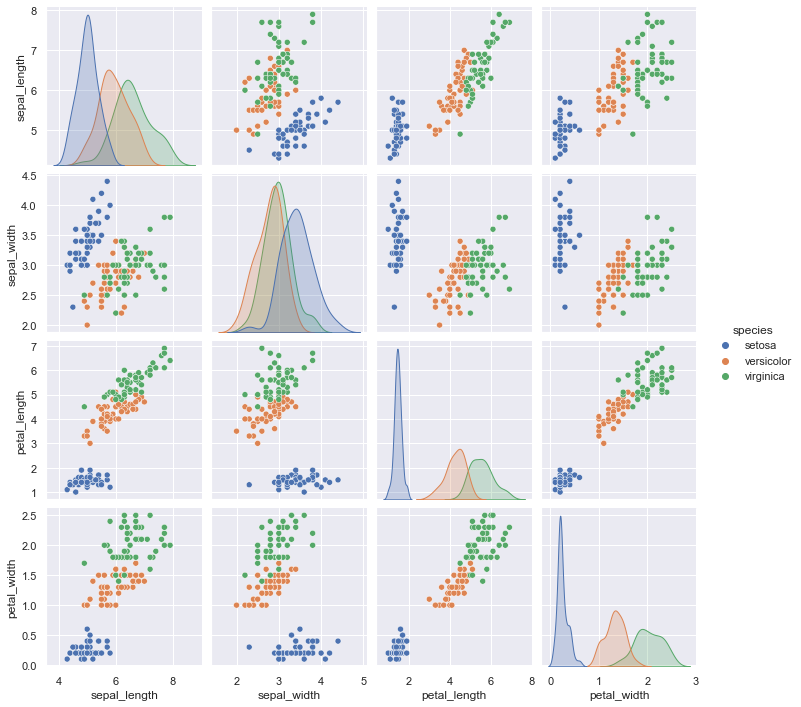

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

iris = sns.load_dataset(name="iris")
print(iris)
sns.pairplot(data=iris, hue="species")
plt.show()

上図から，決定境界を可視化しやすいように２次元の説明変数で分類できそうなデータセットにするため，ここでは "sepal_length" と "sepal_width"，それと目的変数の "species" のみ抜き出して用います．

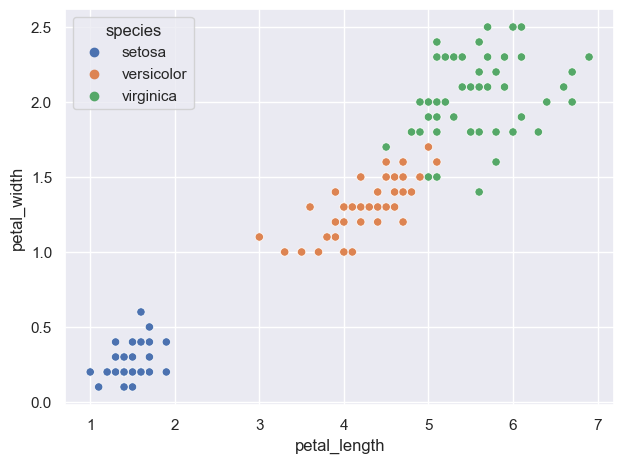

In [2]:
petal = iris[["petal_length", "petal_width", "species"]]
plt.figure(facecolor="white")
sns.scatterplot(data=petal, x="petal_length", y="petal_width", hue="species")
plt.tight_layout()
plt.show()

データを可視化してみるとこの状態で線形分離できそうです．  
scikit-learn の学習では，ラベルは 0, 1, ..., と整数にする必要があります．  
このようにラベルなどのカテゴリー変数を数値に変換することをラベルエンコーディング (label encoding) と呼びます．  
お手正の変換用の辞書でも構いませんが，scikit-learn にラベルエンコーディングできる関数が用意されていますので，今回は "sklearn.preprocessing.LabelEncoder" を用いて，説明変数を "x"，目的変数を "y" としておきます．  
さらに，ついでに学習用と検証用でデータ分割しておきます．

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 説明変数のカラムだけ抜き出す
x = petal[[v for v in petal.columns if str(v).startswith("petal_")]]
# "species" カラムをラベルエンコーディングして y と置く
encoder = LabelEncoder()
encoder.fit(petal["species"])
y = encoder.transform(petal["species"])

# データ分割
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0, stratify=y
)
print(y_train[:10])

[0 0 0 0 1 0 2 2 1 2]


目的変数はクラスなので SVC，また，線形分離できそうだったのでカーネル関数は "linear" を用います．  
使い方は scikit-learn なので，いつも通り「モデル定義」→「fit メソッドで学習」→「predict メソッドで推論」です．

In [4]:
from sklearn import svm

model = svm.SVC(C=1, kernel="linear")
model.fit(x_train, y_train)
print(model.predict(x_train)[:10])

[0 0 0 0 1 0 2 2 1 2]


上記出力と y_train[:10] の出力が同等なので，うまく学習できていそうですね．  
学習に用いていない検証用データセットについても推論し，認識精度を算出してみます．

In [5]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
print(f"正解ラベル： {y_test}")
print(f"推論結果：   {y_pred}")
print(accuracy_score(y_true=y_test, y_pred=y_pred))

正解ラベル： [0 1 0 2 0 1 2 0 0 1 2 1 1 2 1 2 2 1 1 0 0 2 2 2 0 1 1 2 0 0]
推論結果：   [0 1 0 2 0 1 2 0 0 1 2 1 1 2 1 2 2 1 1 0 0 2 2 2 0 1 1 2 0 0]
1.0


ということで，検証用データセットについて認識精度 100 % の推論結果となりました．  
実際，どのような決定境界が得られたのか図示してみましょう．  
以下の関数は，インプレス出版の「[第2版］Python機械学習プログラミング 達人データサイエンティストによる理論と実践」 (https://book.impress.co.jp/books/1120101017 ：リンクは第３版) の p.32 ｎ "plot_decision_regions" 関数を参考にしました．

In [6]:
import warnings
from matplotlib.colors import ListedColormap

def plot_decision_regions(
    x: np.ndarray,
    y: np.ndarray,
    model,
    resolution: float = 0.02,
    xlabel: str = None,
    ylabel: str = None,
    figsize: tuple = (6, 5),
    encoder: LabelEncoder = None,
) -> None:
    # キャスト
    x = np.array(x)
    y = np.array(y)
    # マーカーとカラーマップの準備
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors=colors[:len(np.unique(y))])

    # 決定境界のプロット
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )
    # 各特徴量を１次元配列に変換して予測を実行
    z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    z = z.reshape(xx1.shape)

    # プロット
    plt.figure(figsize=figsize)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとにサンプルをプロット
    for idx, label in enumerate(np.unique(y)):
        if encoder:
            label_name = encoder.inverse_transform([label])[0]
        else:
            label_name = label

        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            plt.scatter(
                x=x[y==label, 0],
                y=x[y==label, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=label_name,
                edgecolor="black",
            )

    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    plt.clf()
    plt.close()

accuracy score: 0.960000


c:\Users\multi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


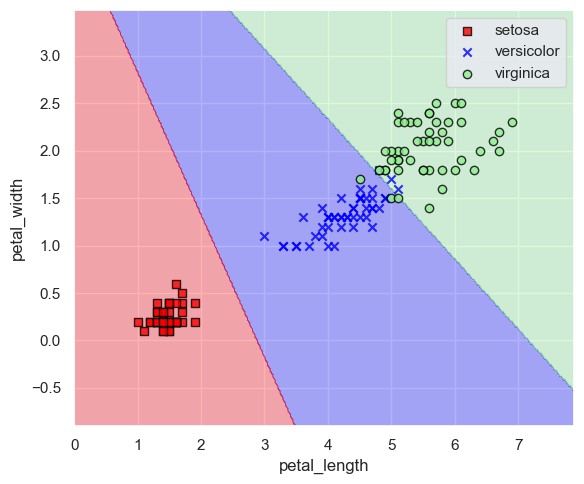

In [7]:
print(f"accuracy score: {accuracy_score(y_true=y, y_pred=model.predict(x)):.6f}")
plot_decision_regions(
    x=x, y=y, model=model, xlabel="petal_length", ylabel="petal_width", encoder=encoder
)

(petal_length, petal_width) = (5, 1.5) あたりは誤認識が少しありますが，良い感じに品種分割できていますね．

### 非線形問題

ではこちらの分布では linear SVC による決定境界はどうなるでしょうか？

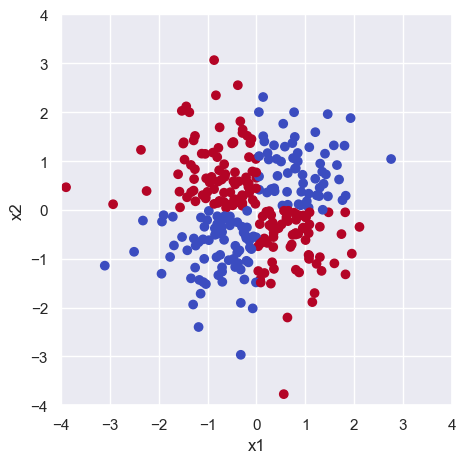

In [8]:
rng = np.random.default_rng(seed=0)
size = 300
# 説明変数
x = rng.normal(size=size*2).reshape((size, 2))
# 目的変数
y = x[:,0]*x[:,1] > 0

fig = plt.figure(facecolor="white")
ax = plt.axes(aspect="equal")
ax.scatter(x[:, 0], x[:, 1], c=y, cmap="coolwarm_r")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
fig.tight_layout()
plt.show()

上図は $x_1 \times x_2$ が 0 より大きくなる点（第１，３象限）を True で青, 0 以下になる点（第２，４象限）を False で赤としてプロットしています．  
kernel="linear" として SVC で全てのデータを学習して決定境界を表示してみます．

accuracy score: 0.536667


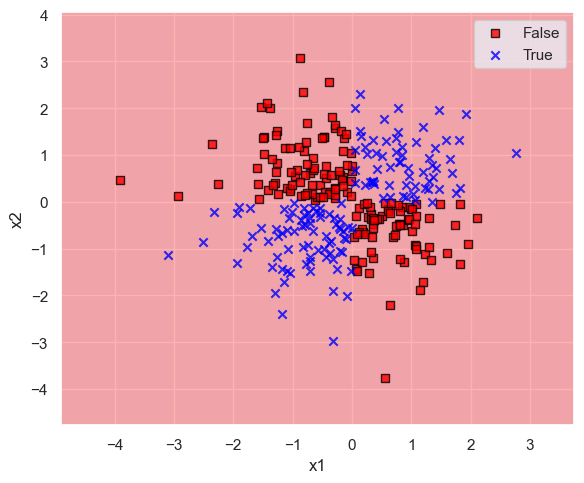

In [9]:
model = svm.SVC(C=1.0, kernel="linear")
model.fit(x, y)
print(f"accuracy score: {accuracy_score(y_true=y, y_pred=model.predict(x)):.6f}")
plot_decision_regions(x=x, y=y, model=model, xlabel="x1", ylabel="x2")

予想通り全然ダメですね．  
ということで，線形分離は不可能なので kernel="rbf" としてみましょう．

accuracy score: 0.960000
gamma: 0.503200


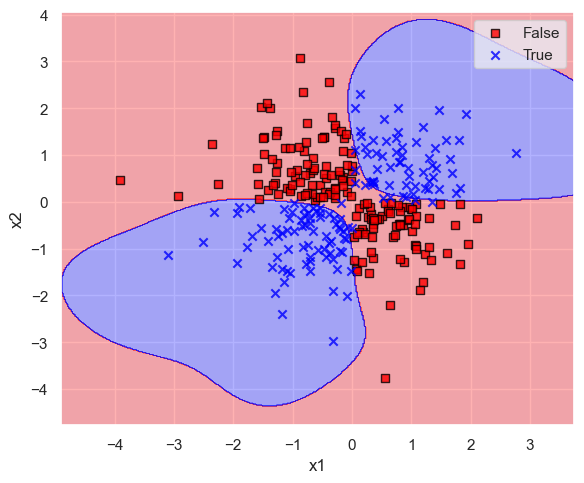

In [10]:
model = svm.SVC(C=1.0, kernel="rbf")
model.fit(x, y)

# gamma="scale" のときの実際の値
gamma_default = 1 / (len(set(y)) * x.var())
print(f"accuracy score: {accuracy_score(y_true=y, y_pred=model.predict(x)):.6f}")
print(f"gamma: {gamma_default:.6f}")
plot_decision_regions(x=x, y=y, model=model, xlabel="x1", ylabel="x2")

上図のとおり kernel="rbf" とすると認識精度も 96.0 % で決定境界が描けています．  
第１，３象限全体を青色で覆うことができるような決定境界となるのが理想ですね．  
このように，kernel を変更することで非線形問題についても SVM を適用させることができます．  
決定境界の複雑さを調整できるハイパーパラメータ gamma を変更した場合について，決定境界を以下で可視化してみます．


--------------------------------------------------
accuracy score: 0.736667
gamma: 0.050320


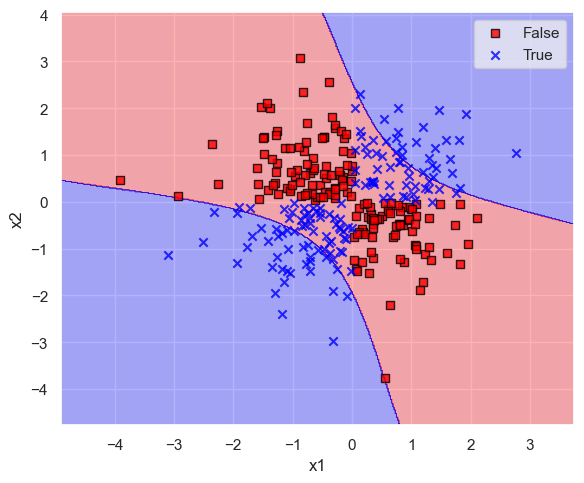


--------------------------------------------------
accuracy score: 0.986667
gamma: 5.031995


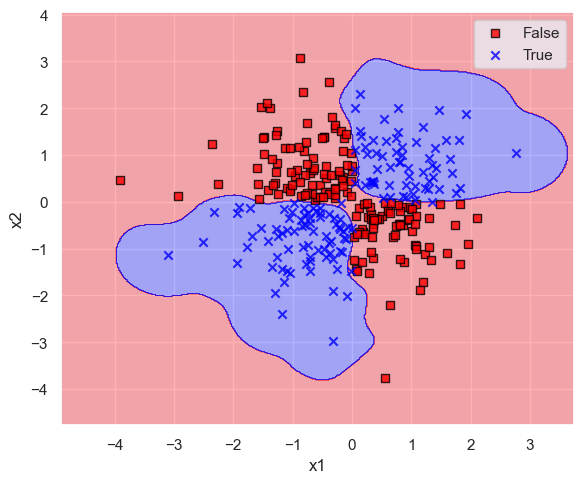


--------------------------------------------------
accuracy score: 0.996667
gamma: 50.319951


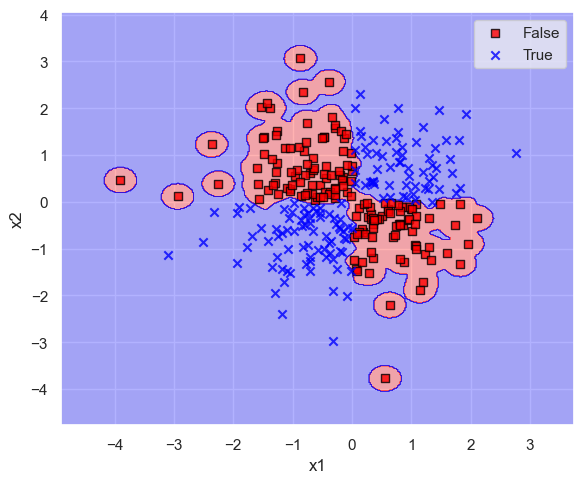

In [11]:
def search_gamma(x: np.ndarray, y: np.ndarray, ratio: float = 1.0) -> None:
    # gamma をデフォルトから ratio 倍で定義
    gamma = gamma_default * ratio

    model = svm.SVC(C=1.0, kernel="rbf", gamma=gamma)
    model.fit(x, y)
    print(f"accuracy score: {accuracy_score(y_true=y, y_pred=model.predict(x)):.6f}")
    print(f"gamma: {gamma:.6f}")
    plot_decision_regions(x=x, y=y, model=model, xlabel="x1", ylabel="x2")


for ratio in [1/10, 10, 100]:
    print("\n--------------------------------------------------")
    search_gamma(x=x, y=y, ratio=ratio)

このように，gamma が大きいと決定境界が複雑になり，学習データにフィットしていき，認識精度も増加しています．  
しかしながらデータにフィットしすぎている（過学習に陥っている）あまり，gamma≒5 では第１，３象限，gamma≒50 では第２，４象限の決定境界が意に反した結果になってしまっています．  
結果を見ると，あれこれ変更するよりデフォルトの gamma="scale" のままが良さそうでした．

---

## 演習問題

Q1. ワインデータセットについて，以下を参照して，目的変数であるワインの等級を SVC によって求めてください．

- データ分割は train_test_split にて行い，学習用データは全データの 90 %，データのシャッフルは True としてください（結果に再現性を持たせたい場合は，引数 random_state に任意の数を設定してください）
- データは，以下のコードにて読み込むことができます（データの説明はこちら：https://slash-z.com/matplotlib-first-step/）

```python
from sklearn.datasets import load_wine

df_x, df_y = load_wine(return_X_y=True, as_frame=True)
```

- scikit-learn を用いて分類問題における認識精度を確認するには，以下のようにして算出が可能です．

```python
from sklearn.metrics import accuracy_score

print(accuracy_score(y_true, y_pred))
```

Q2. カリフォルニア住宅価格データセットについて，SVR を用いて以下の手順で住宅価格を予測してみましょう．
- 次のコードでデータ読み込み，学習用／検証用にデータを分割します．

```python
from sklearn.datasets import fetch_california_housing

df_x, df_y = fetch_california_housing(return_X_y=True, as_frame=True)
x_train, x_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.25, shuffle=True, random_state=0,
)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
```

- 学習用データ (x_train, y_train) のみを学習し，検証用データ x_test について住宅価格を予測しましょう．
- 上記で予測した住宅価格について，正解の値との絶対平均誤差を算出してみましょう．

以下のコードにて絶対平均誤差が算出できます．
ここで，y_true は正解データの y_test，y_pred には x_test に対するモデルの推論結果を代入してください．

```python
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_true, y_pred))
```

Q3. カルフォルニア大学アーバイン校（UCI）が提供している，手書き数字のデータセット (API: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) について，何の数字かを認識してみましょう．データ読み込みは以下のコードを実行します．

```python
from sklearn.datasets import load_digits

# データ読み込み
x, y = load_digits(return_X_y=True)
```